In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

genderclassmodel.csv
gendermodel.csv
gendermodel.py
myfirstforest.py
test.csv
train.csv



In [13]:
train = pd.read_csv('../input/train.csv')
train.set_index('PassengerId',inplace = True)
test = pd.read_csv('../input/test.csv')
test_id = list(test['PassengerId'])
test.set_index('PassengerId',inplace = True)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Deck        891 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 130.5+ KB


In [15]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
train['Deck'] = train['Cabin'].apply(lambda x: str(x)[0] if x != 'NaN' else 'N')

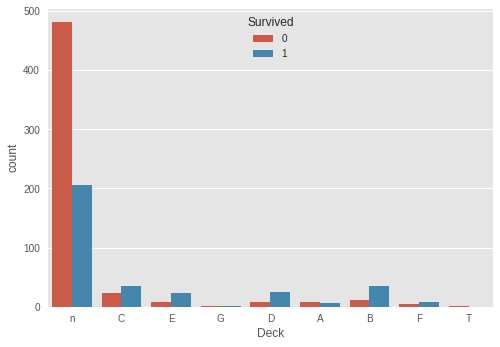

In [18]:
import matplotlib
matplotlib.style.use('ggplot')
plt.figure()
sns.countplot(x="Deck", data=train,hue ='Survived')

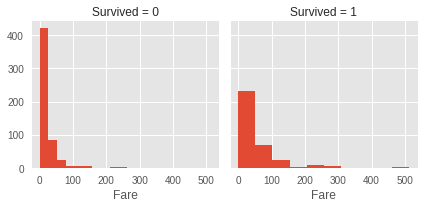

In [19]:
g = sns.FacetGrid(train, col="Survived")
g.map(plt.hist,'Fare')

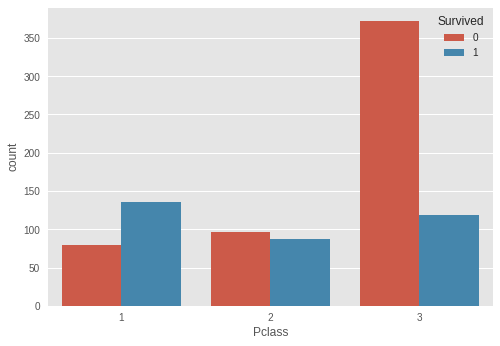

In [27]:
sns.countplot(x = 'Pclass',data = train,hue = 'Survived')

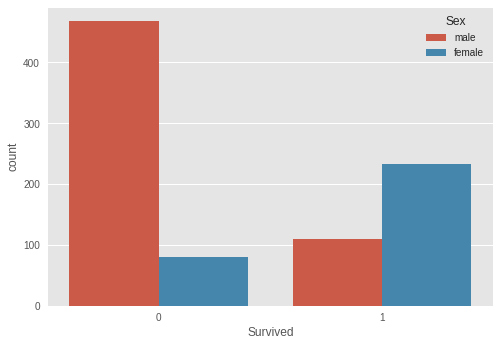

In [28]:
sns.countplot(x = 'Survived',data = train,hue = 'Sex')

In [50]:
male_servived = sum((train['Survived'] == 1) & (train['Sex'] == 'male' )) / train.Sex.value_counts()[0]
female_servived = sum((train['Survived'] == 1) & (train['Sex'] == 'female' )) / train.Sex.value_counts()[1]
male_servived,female_servived

(0.18890814558058924, 0.7420382165605095)

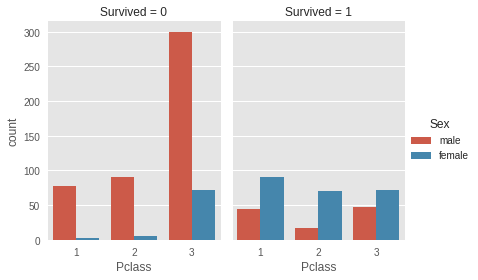

In [48]:
sns.factorplot(x="Pclass", hue="Sex", col="Survived",data=train, kind="count",size=4, aspect=.7)

In [104]:
features = ['Pclass','Sex_new','Age','Fare'] 
train.dropna(subset=['Age'],inplace = True)
test.dropna(subset=['Age','Fare'],inplace = True)
from sklearn import svm
train['Sex_new'] = train['Sex'].apply(lambda x: 0 if x == 'female' else 1)
test['Sex_new'] = test['Sex'].apply(lambda x: 0 if x == 'female' else 1)
X_train = train[features]
y_train = train['Survived']
X_test = test[features]
#y_test = test['Survived']
clf = svm.SVC().fit(X_train,y_train)
#train.Sex_new.value_counts()


In [105]:
clf.score(X_train,y_train)

0.92577030812324934

In [149]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier
from sklearn.ensemble     import RandomForestRegressor
classifiers = {
    "SGD": SGDClassifier(alpha=100),
    "ASGD": SGDClassifier(average=True),
    "Passive-Aggressive I": PassiveAggressiveClassifier(loss='hinge', C=1.0),
    "SAG": LogisticRegression(solver='liblinear',C=1.e4 / train[features].shape[0]),
    "RF_C": RandomForestClassifier(max_depth=20,n_estimators=13),
    "RF_R": RandomForestRegressor(n_estimators=15,max_depth=22)
}

In [150]:
for classifier_type in classifiers.keys():  
    # Train classifier
    clf2 = classifiers[classifier_type]
    clf2.fit(X_train, y_train)
    print(classifier_type, ':', clf2.score(X_train,y_train))

SGD : 0.647058823529
ASGD : 0.687675070028
Passive-Aggressive I : 0.40756302521
SAG : 0.792717086835
RF_C : 0.977591036415
RF_R : 0.87269646124


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/lib/python3.6/site-packages/s